In [305]:
% matplotlib inline
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import rcParams, pyplot as plt
rcParams['figure.figsize'] = [12, 8]

In [260]:
seed = 7

In [261]:
df = pd.read_csv('../AA_4_computed.csv', header=None).fillna(0)
ds = df.values
titles = ds[0,:]
ds = ds[1:, :]
X = ds[:,[0, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17]] #manual selection of numeric fields
Y = np.reshape(ds[:, 2], (len(ds[:, 2]), 1))

In [262]:
print(X, Y, titles)
years = np.unique(ds[:,0])

[['2014' 'Jason Blum' '8.5' ..., '0.0077645658' '0.0120241768'
  '10.1437375758']
 ['2014' 'Tim Bevan' '7.7' ..., '0.0352939815' '0.043876195' '8.1431848']
 ['2014' 'Alejandro G. Iñárritu' '7.8' ..., '0.042352806' '0.0370754662'
  '5.7341718889']
 ..., 
 ['1927' 'Paramount Famous Lasky' '7.8' ..., '0.0047057418' 0 '0']
 ['1927' 'Fox' '7.8' ..., 0 0 0]
 ['1927' 'The Caddo Company' '6.9' ..., '0' 0 0]] [['False']
 ['False']
 ['True']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['True']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['True']
 ['False']
 ['False']
 ['False']
 ['False']
 ['True']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['True']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['False']
 ['True']
 ['False

In [263]:
encoder_r = LabelEncoder()
encoder_p = LabelEncoder()
encoder_y = LabelEncoder()
encoder_r.fit(Y)
encoder_p.fit(X[:, 1])
encoder_y.fit(X[:, 0])
Y = encoder_r.transform(Y)
X[:, 1] = encoder_p.transform(X[:, 1])
X[:, 0] = encoder_y.transform(X[:, 0])
# print(X, np.unique(X[:, 0], return_counts=True))
print(Y)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [297]:
# print(X[0,:])
X = X.astype(float)
# print(X[0,:])
years = np.unique(X[:,0]).astype(int)
years_test = np.random.choice(years, int(len(years) * 0.10), replace=False)
X_years_removed = X[np.where(np.in1d(X[:,0], years_test))]
Y_years_removed = Y[np.where(np.in1d(X[:,0], years_test))]
X_ftest = X[np.where(~np.in1d(X[:,0], years_test))]
Y_ftest = Y[np.where(~np.in1d(X[:,0], years_test))]
print(years_test)

[61 57 33 82  7 79 17 27]


In [311]:
n = len(X[0, :])
def create_baseline():
    model = Sequential()
    model.add(Dense(n, input_dim=n, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_smaller():
    model = Sequential()
    model.add(Dense(n / 2, input_dim=n, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_larger():
    model = Sequential()
    model.add(Dense(n, input_dim=n, init='normal', activation='relu'))
    model.add(Dense(n / 2, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_larger_dropout_inputs():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(n,)))
    model.add(Dense(n, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dense(n / 2, init='normal', activation='relu', W_constraint=maxnorm(3)))
    model.add(Dense(1, init='normal', activation='sigmoid'))
#     sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_larger_dropout_hidden():
    model = Sequential()
    model.add(Dense(n, input_dim=n, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(n / 2, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
#     sgd = SGD(lr=1, momentum=0.9, decay=0.5, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_larger_dropout_outputs():
    model = Sequential()
    model.add(Dense(n, input_dim=n, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dense(n / 2, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
#     sgd = SGD(lr=10, momentum=0.99, decay=0.75, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model  

def create_larger_dropout_everywhere():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(n,)))
    model.add(Dense(n, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(n / 2, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
#     sgd = SGD(lr=1, momentum=0.9, decay=0.5, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_extra_larger_dropout_everywhere():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(n,)))
    model.add(Dense(n, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(n / 2, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(n / 4, init='normal', activation='relu', W_constraint=maxnorm(5)))
    model.add(Dropout(0.2))
    model.add(Dense(1, init='normal', activation='sigmoid'))
#     sgd = SGD(lr=1, momentum=0.9, decay=0.5, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_custom():
    model = Sequential()
    model.add(Dense(n*.75, input_dim=n, init='normal'))
    model.add(Activation('relu'))
    model.add(Dropout(.05))
    # model.add(SReLU())
    model.add(Dense(n / 2, init='normal', activation='relu'))
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

def create_custom_tanh():
    model = Sequential()
#     model.add(Dropout(.05, input_shape=(n,))) 
    model.add(Dense(n*.75, init='normal', input_dim=n))
    model.add(Activation('relu'))
#     model.add(Dropout(.05)) 
    # model.add(SReLU())
    model.add(Dense(n / 2, init='normal', activation='relu'))
#     model.add(Dropout(.05)) #new
    model.add(Dense(n / 4, init='normal', activation='tanh'))
    model.add(Dropout(.05)) #new
    model.add(Dense(1, init='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall', 'fmeasure'])
    return model

In [76]:
np.random.seed(seed)
estimator = KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 76.55% (8.61%)


In [78]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 81.99% (2.43%)


In [80]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 83.12% (2.73%)


In [195]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, nb_epoch=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 82.76% (2.20%)


In [190]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger_dropout_inputs, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
# print(results)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[ 0.83333334  0.87037038  0.86792454  0.83018869  0.79245284  0.81132077
  0.78846155  0.82692309  0.84615386  0.84615386]
Larger: 83.13% (2.66%)


In [191]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger_dropout_hidden, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger: 81.60% (4.11%)


In [196]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger_dropout_outputs, nb_epoch=200, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('previous (w/ 100 epochs) was: 82.93% (4.15%)')
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

previous (w/ 100 epochs) was: 82.93% (4.15%)
Larger: 80.66% (4.13%)


In [198]:
np.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_extra_larger_dropout_everywhere, nb_epoch=275, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print('previous (w/ 100 epochs) was: 82.20% (1.13%)')
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

previous (w/ 100 epochs) was: 82.20% (1.13%)
Larger: 82.58% (0.57%)


In [156]:
# so we think the large network is the best, although the difference is minimal. all improvements may really be due
# to random chance and the earlier standardaziation of the inputs.

In [299]:
def make_plots(test, preds_c, preds, preds_p, acc, loss, trial):
    #lets see our predictions!
    plt.scatter(range(len(Y_ftest[test])), Y_ftest[test], c="g")
    plt.scatter(range(len(preds_c)), preds_c, c="y", marker='^')
    plt.scatter(range(len(preds)), preds, c="r", marker='s')
    plt.scatter(range(len(preds_p)), preds_p, c="k", marker='D')
    plt.xlim(-2, len(preds) + 2)
    plt.ylim(-0.05, 1.05)
    plt.title('Predictions and actual values for trial %s' % (trial))
    plt.legend(['actual', 'prediction_class', 'prediction_raw', 'prediction_prob'], loc='center')
    plt.show()
    
    # summarize history for accuracy
    plt.plot(acc)
#     plt.plot(hist.history['val_acc']) #only generate these metrics when using val keyword in fit()
    plt.title('model accuracy trial: %s' % (trial))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(loss)
#     plt.plot(hist.history['val_loss'])
    plt.title('model loss trial: %s' % (trial))
    plt.ylabel('loss')
    plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
    plt.show()

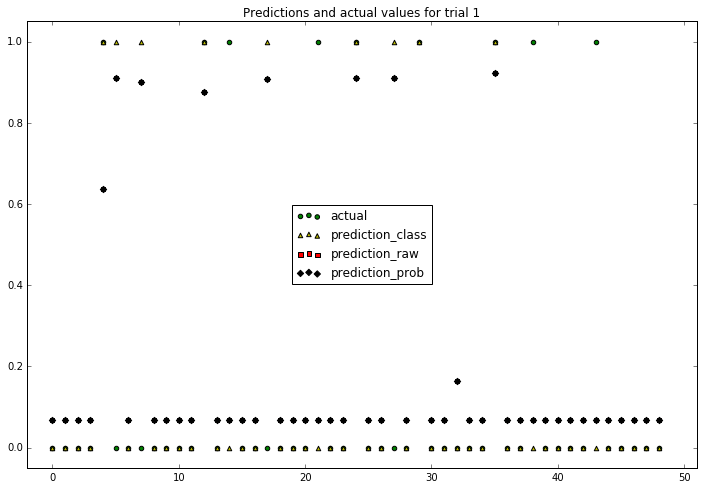

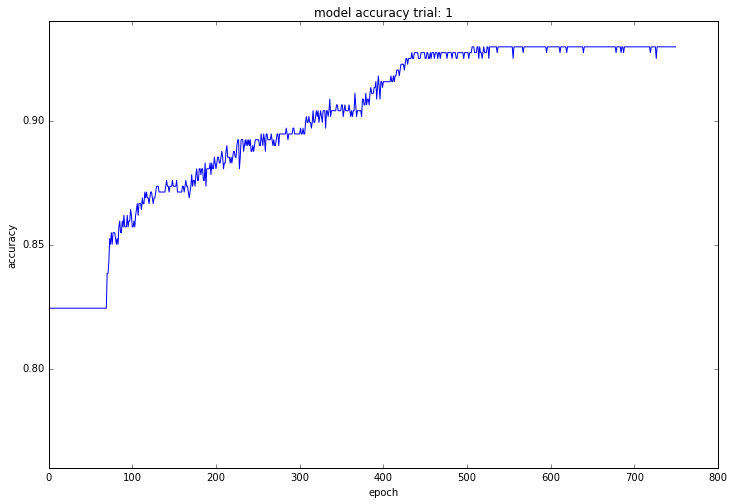

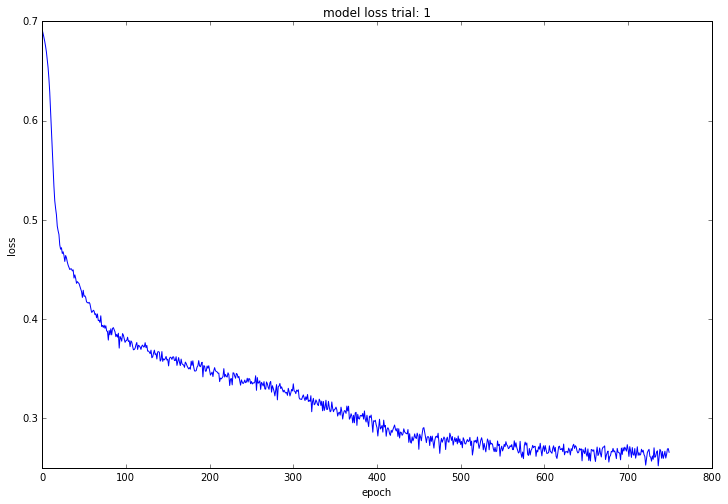

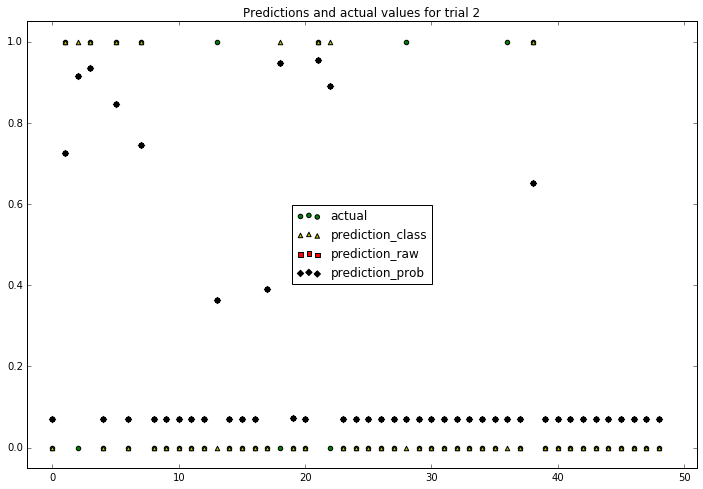

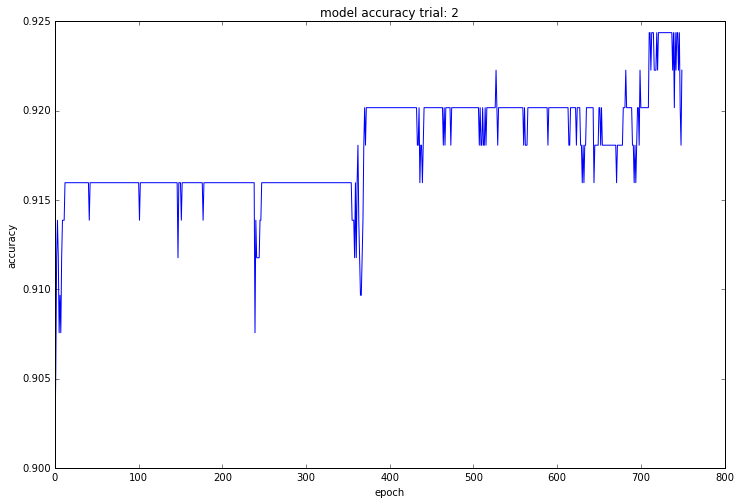

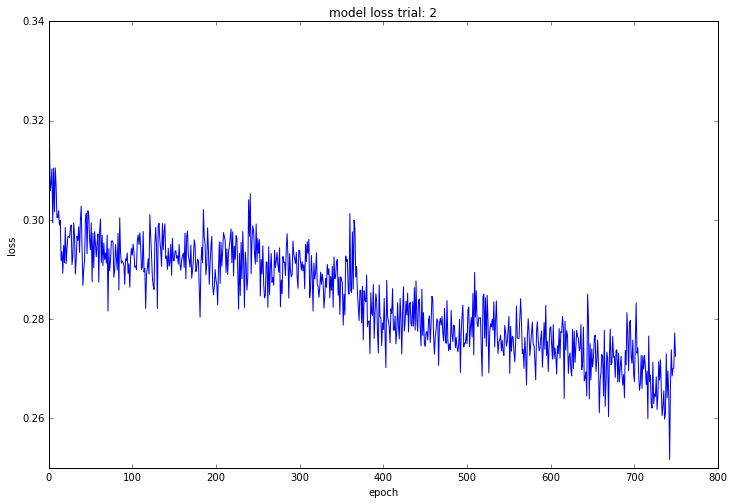

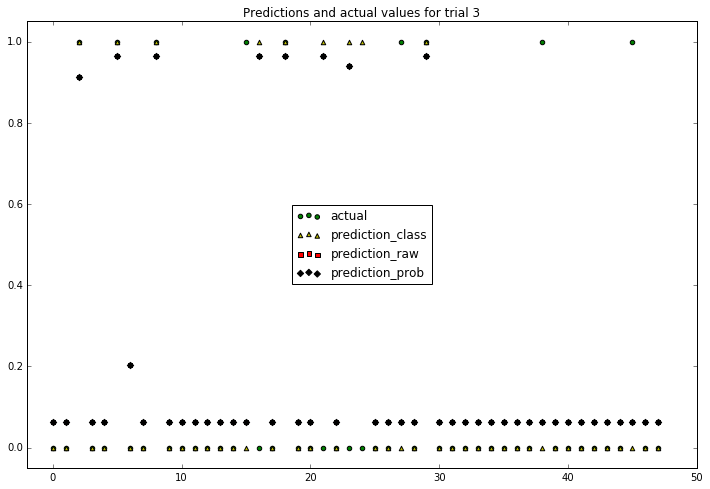

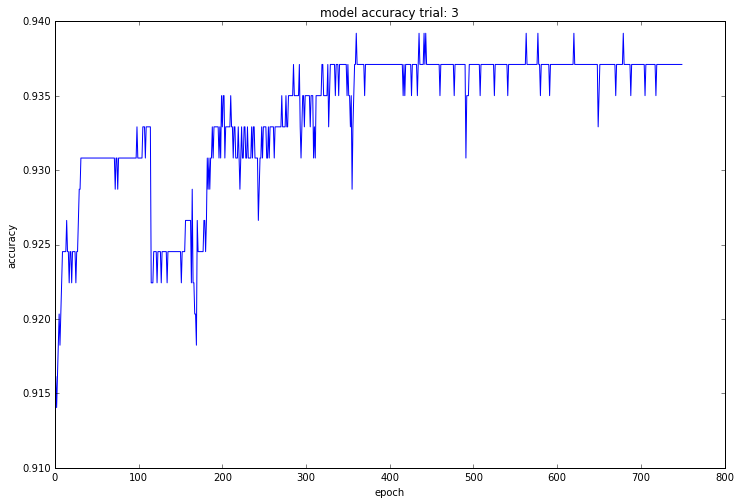

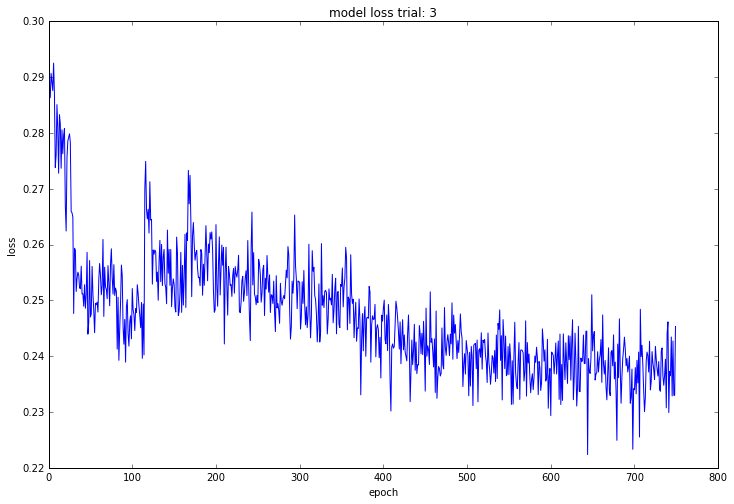

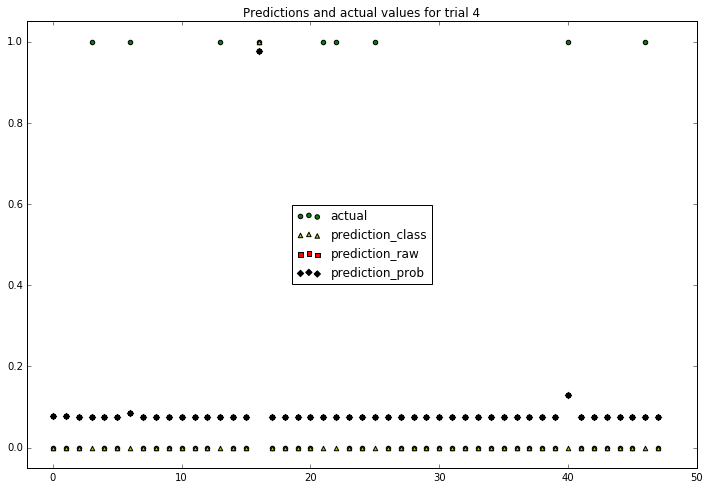

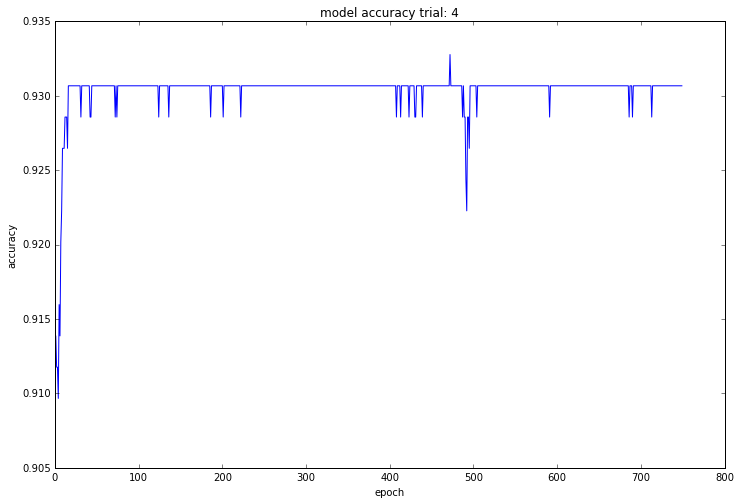

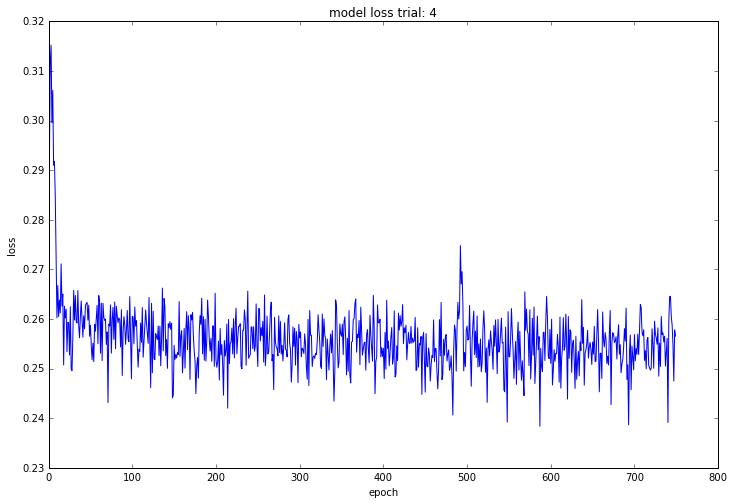

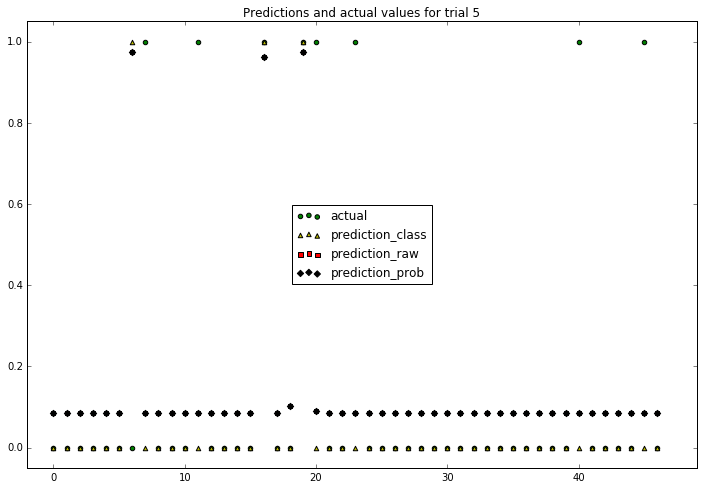

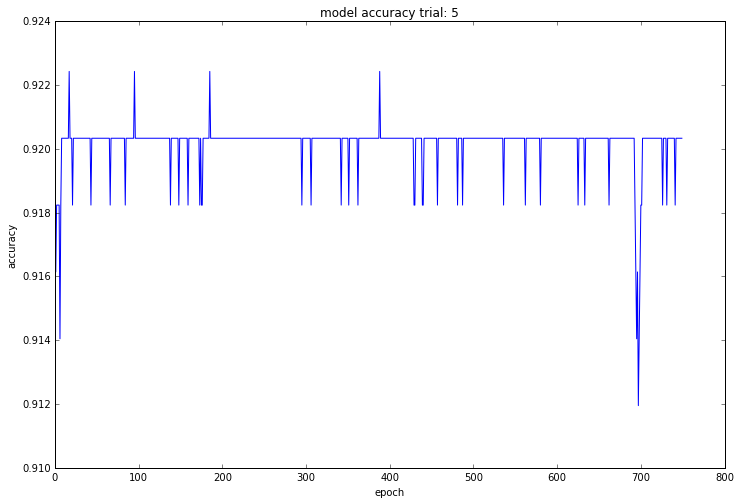

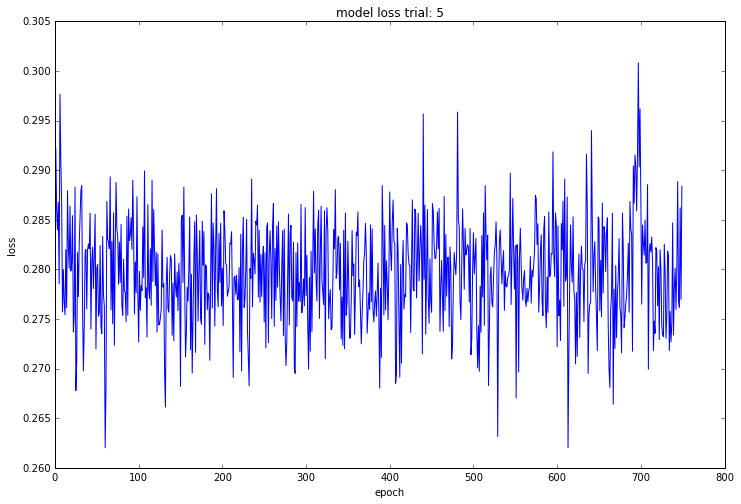

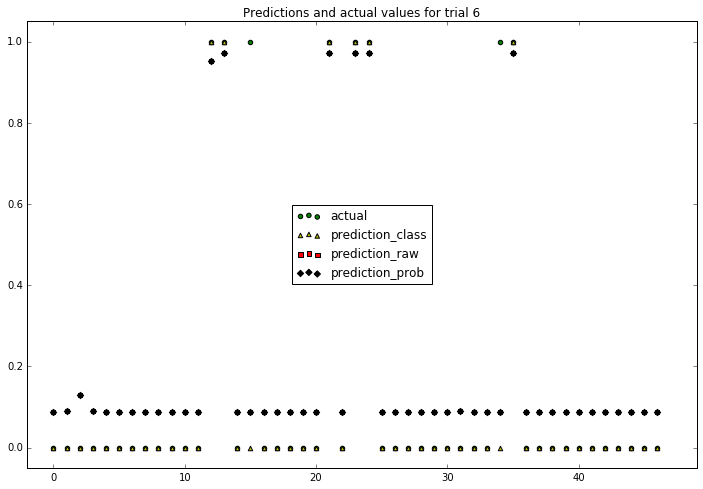

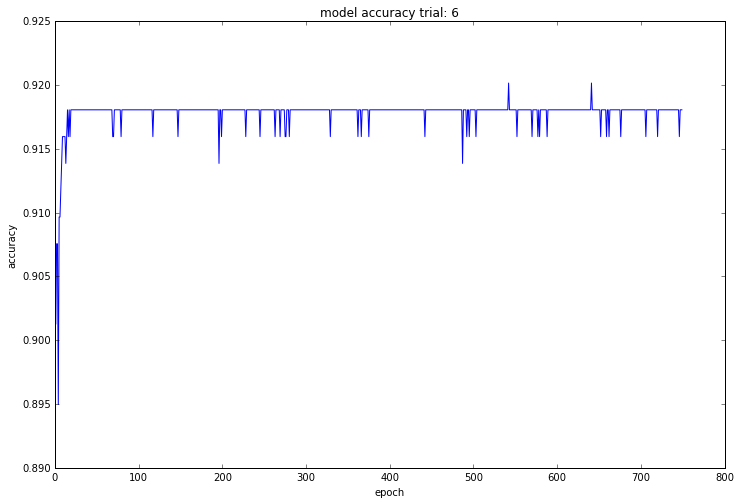

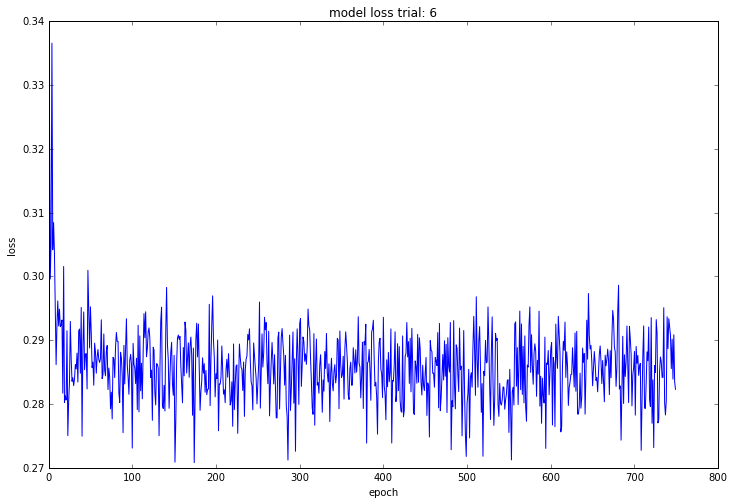

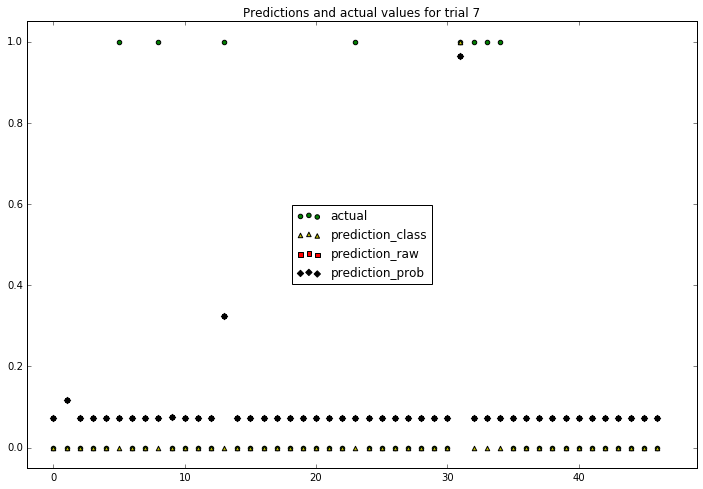

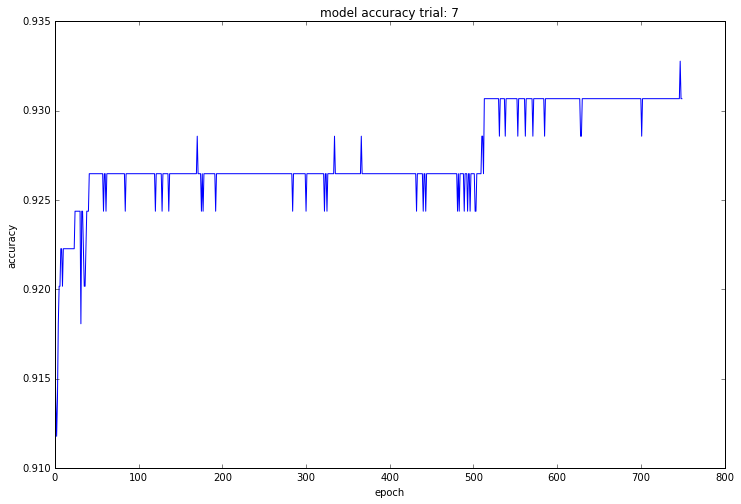

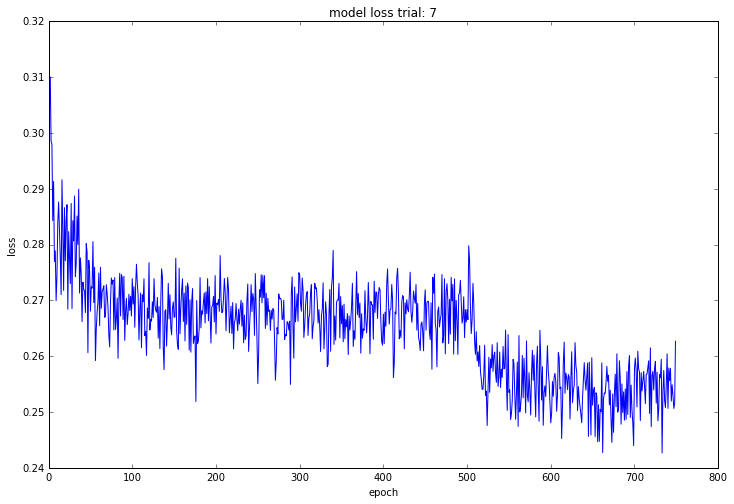

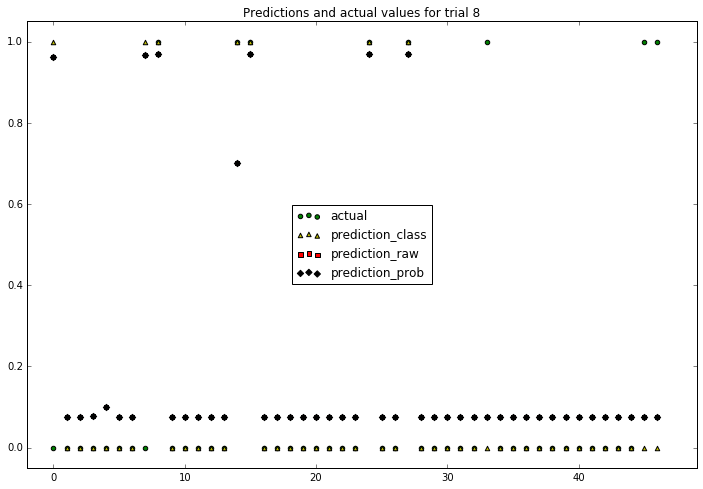

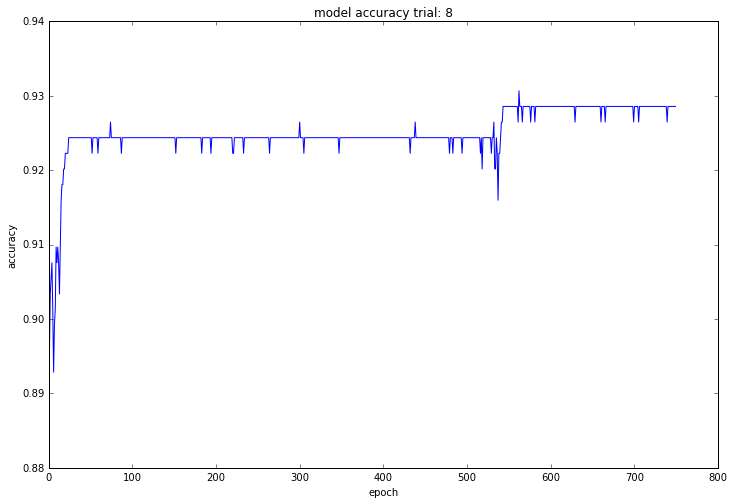

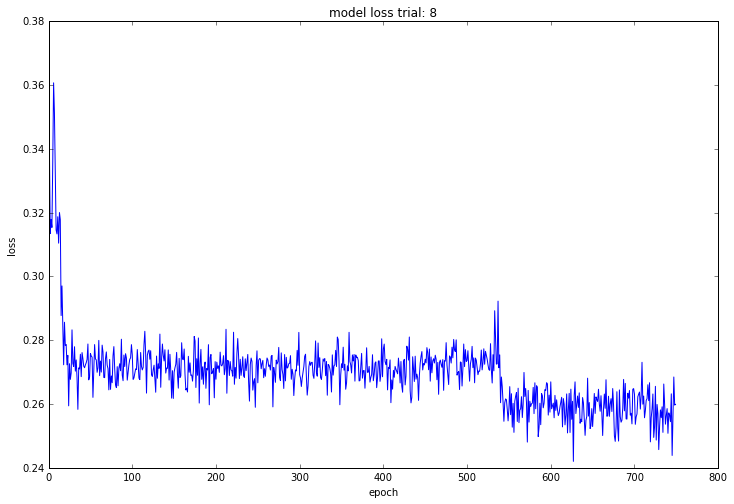

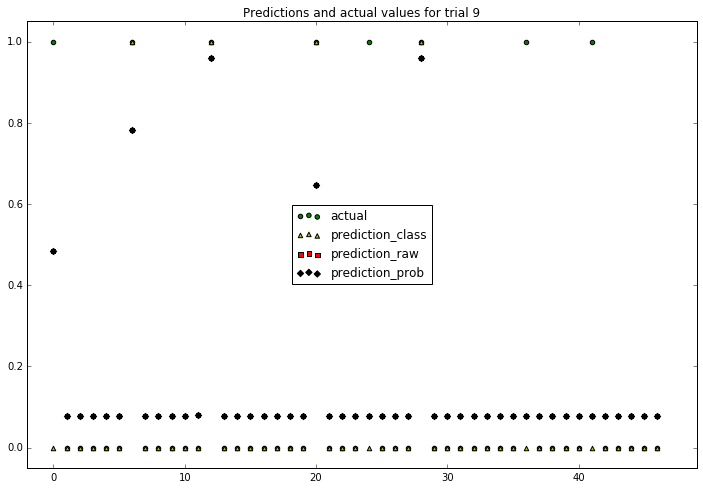

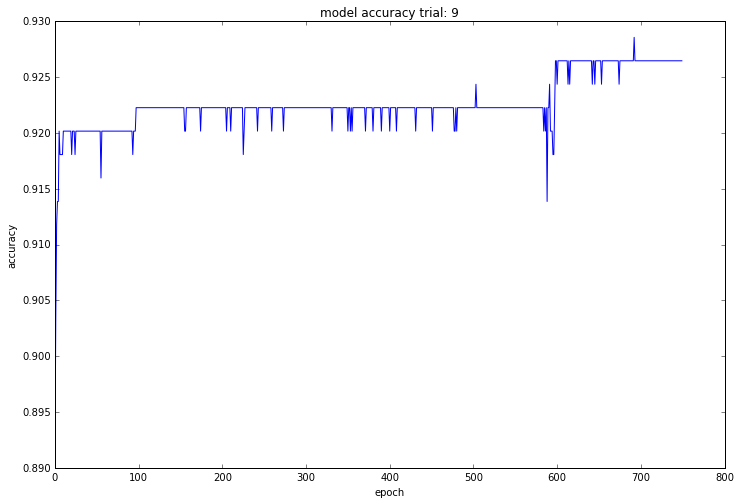

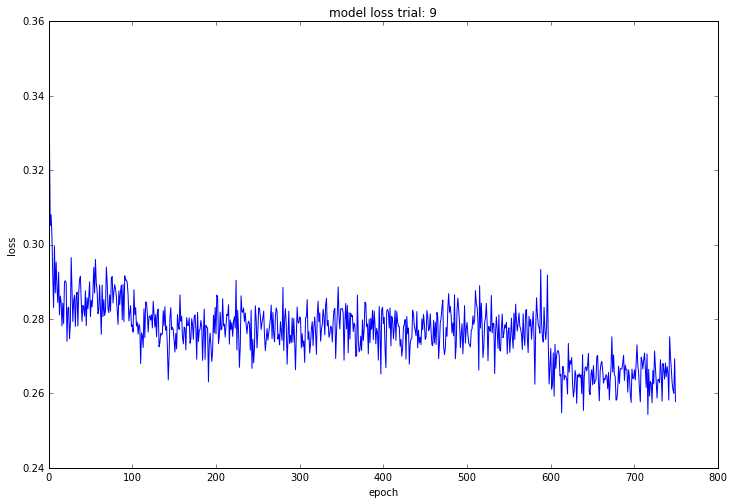

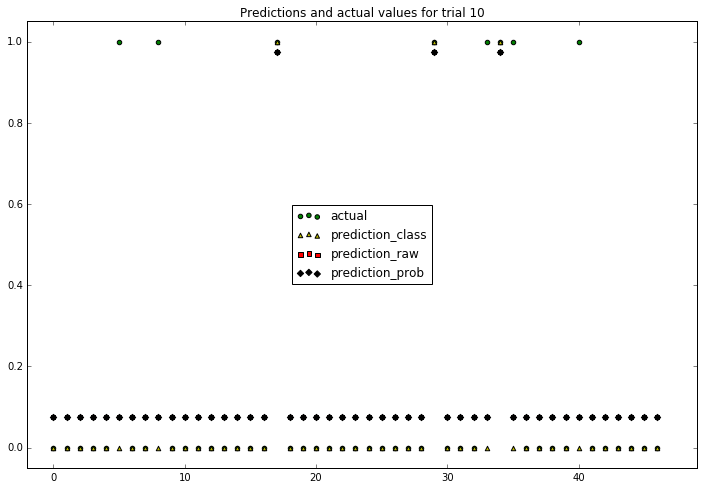

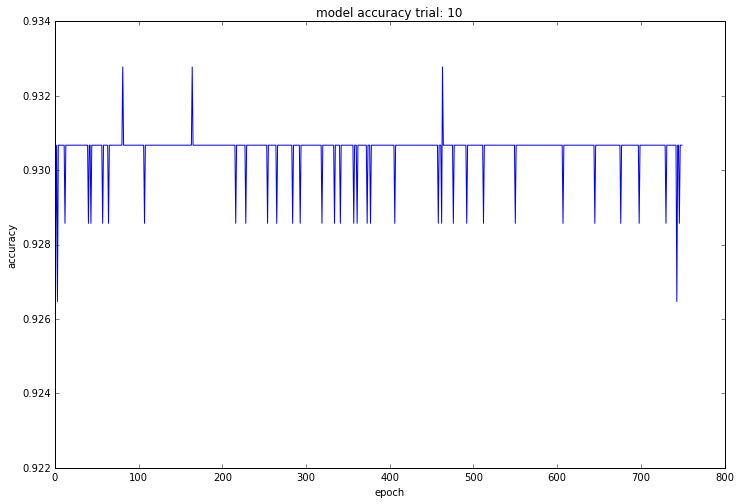

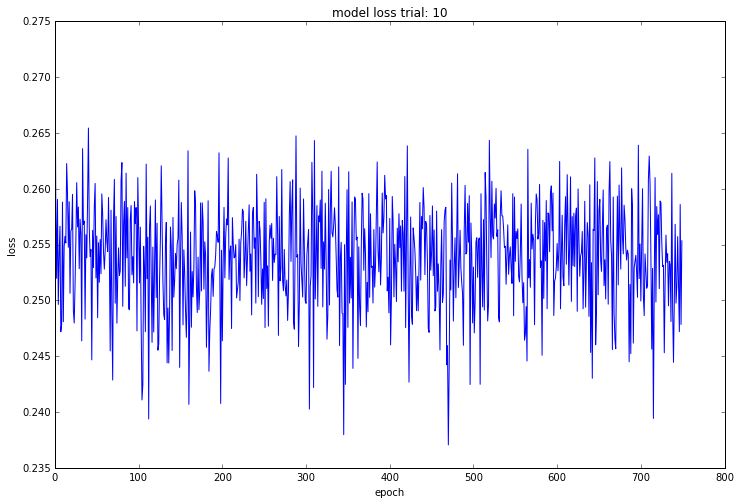

In [312]:
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
trial = 1
accs = []
precs = []
recs = []
fscores = []
model = create_custom_tanh()
last_test = None
for train, test in kfold.split(X_ftest, Y_ftest):
    X_scaler = StandardScaler()
#     print(test, last_test, np.concatenate((test, last_test)))
    if last_test is not None:
        X_train = X_scaler.fit_transform(X_ftest[np.concatenate((train, last_test))])
        X_test = X_scaler.transform(X_ftest[test])
        Y_train = Y_ftest[np.concatenate((train, last_test))]
    else:
        X_train = X_scaler.fit_transform(X_ftest[train])
        X_test = X_scaler.transform(X_ftest[test])
        Y_train = Y_ftest[train]
    hist = model.fit(X_train, Y_train, nb_epoch=750, batch_size=50, verbose=0)
    preds_c = model.predict_classes(X_test, batch_size=50, verbose=0)
    preds = model.predict(X_test, batch_size=50, verbose=0)
    preds_p = model.predict_proba(X_test, batch_size=50, verbose=0)
    scores = model.evaluate(X_test, Y_ftest[test], verbose=0)
    accs.append(scores[1] * 100)
    precs.append(scores[2] * 100)
    recs.append(scores[3] * 100)
    fscores.append(scores[4] * 100)
#     print(scores, model.metrics_names)
#     print(hist.history.keys())
#     print(preds)
    
    make_plots(test, preds_c, preds, preds_p, hist.history['acc'], hist.history['loss'], trial)
    
    last_test = test
    trial += 1


[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


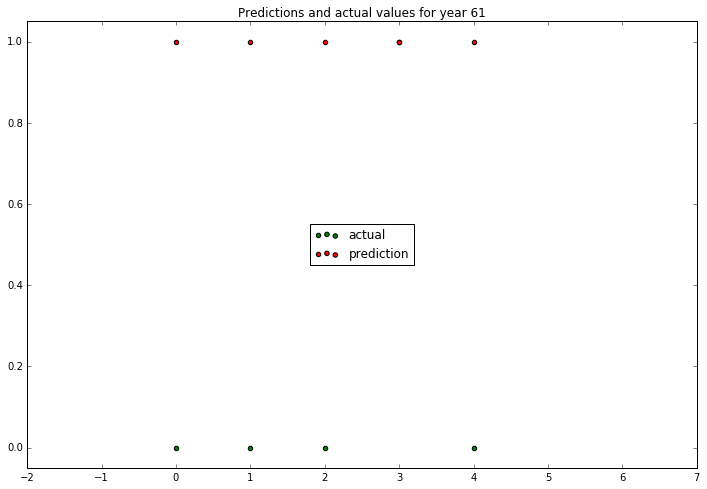

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


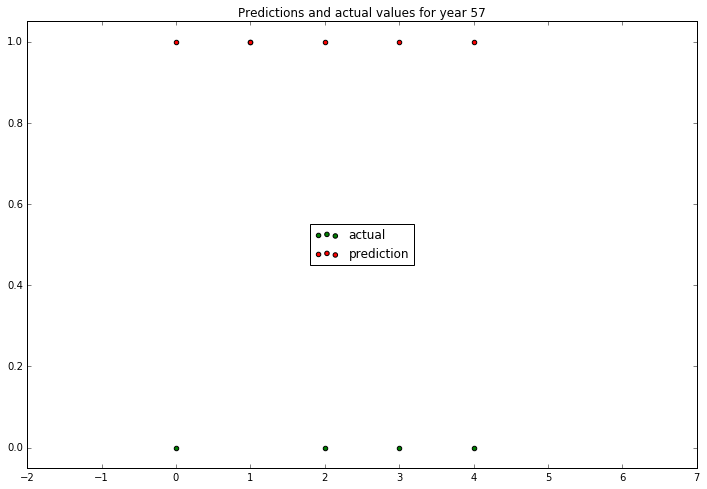

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


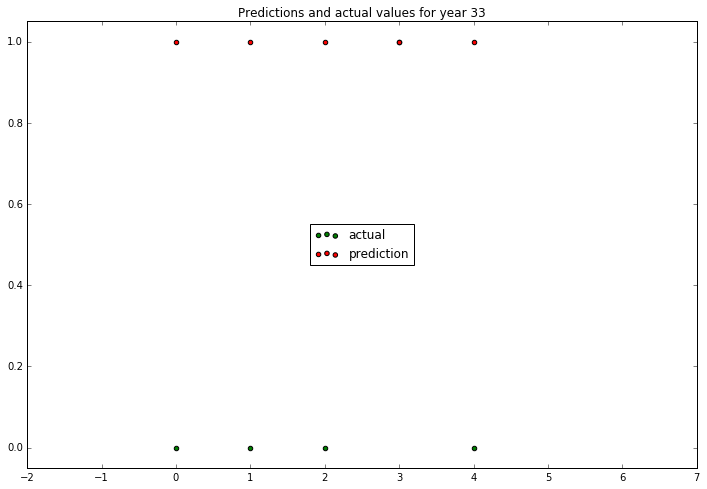

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


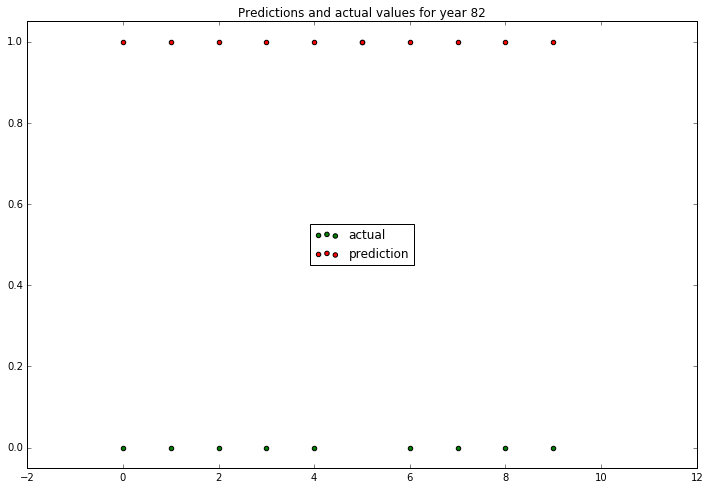

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


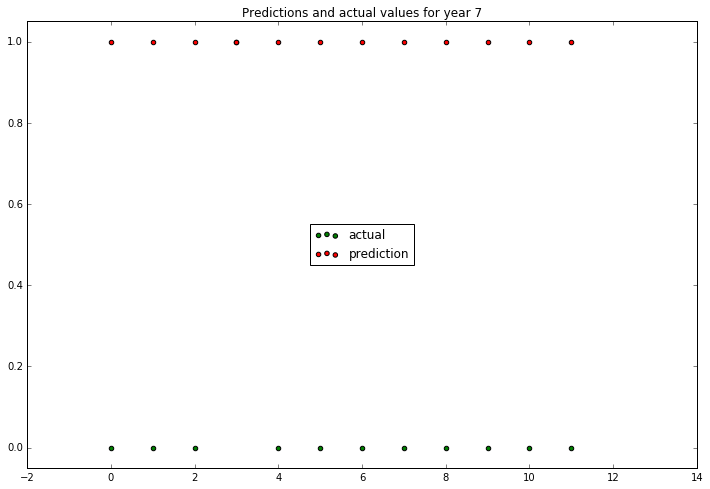

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


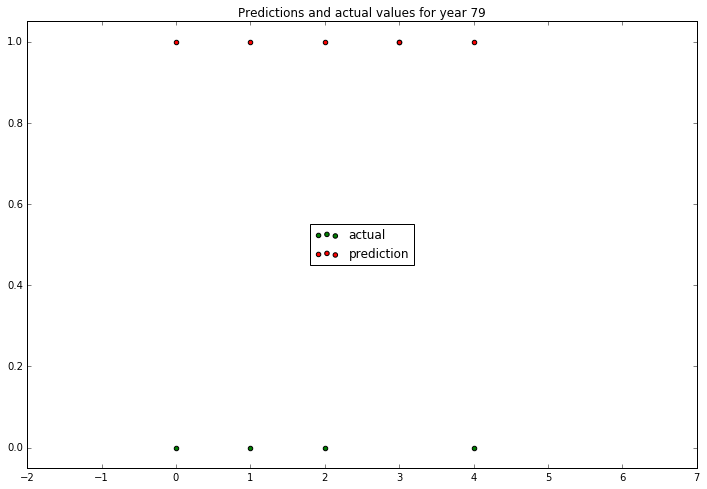

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


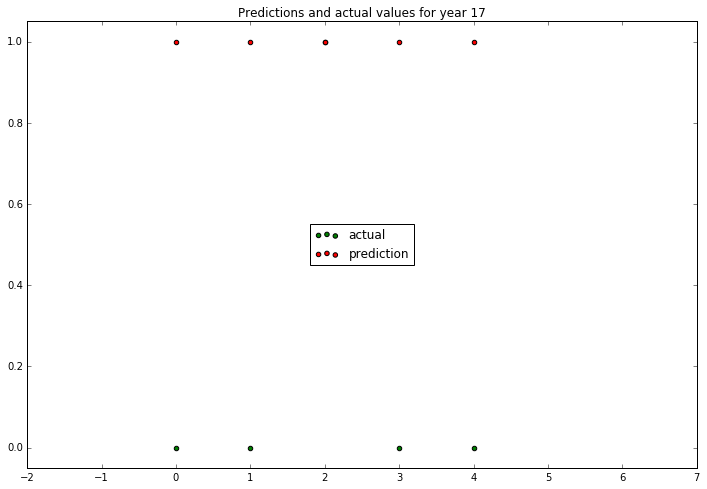

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


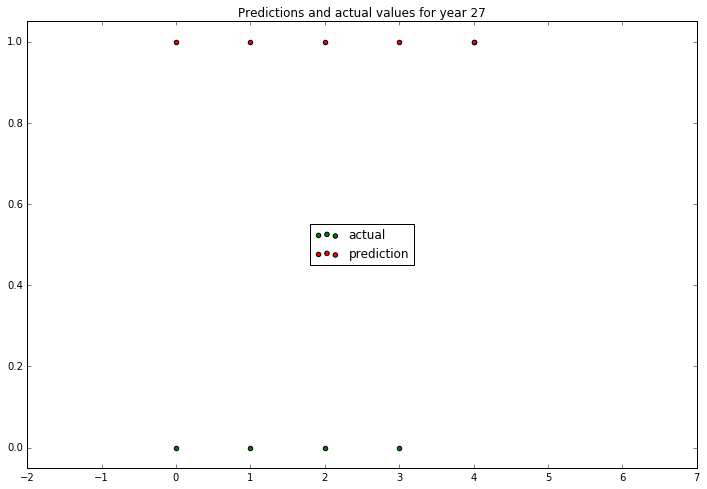

In [313]:
final_preds = model.predict(X_years_removed, batch_size=1, verbose=0)
# print(final_preds)
# print(Y_years_removed)
for year in years_test:
#     np.in1d(Y_years_removed, years_test) 
#     print(np.in1d(X_years_removed[:,0], year))
    tpreds = final_preds[np.where(np.in1d(X_years_removed[:,0], year))]
    print(tpreds)
    tpreds = [1 if p == np.max(tpreds) else 0 for p in tpreds]
    tactual = Y_years_removed[np.where(np.in1d(X_years_removed[:,0], year))]
    
    plt.scatter(range(len(tactual)), tactual, c="g")
    plt.scatter(range(len(tpreds)), tpreds, c="r")
    plt.xlim(-2, len(tpreds) + 2)
    plt.ylim(-0.05, 1.05)
    plt.title('Predictions and actual values for year %s' % (year))
    plt.legend(['actual', 'prediction'], loc='center')
    plt.show()
    
    

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


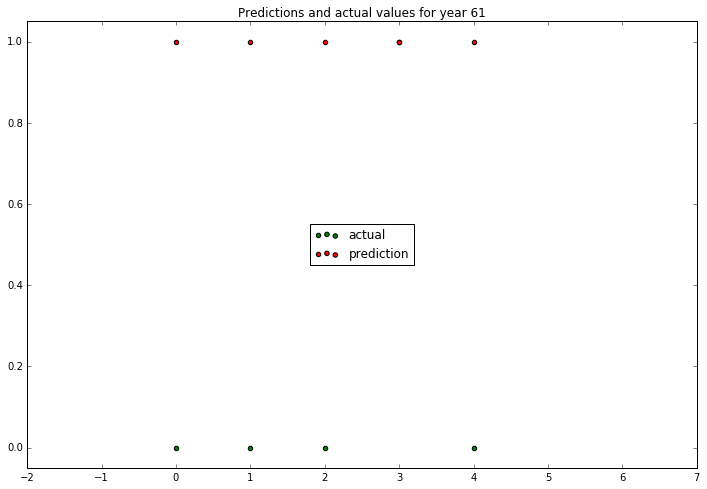

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


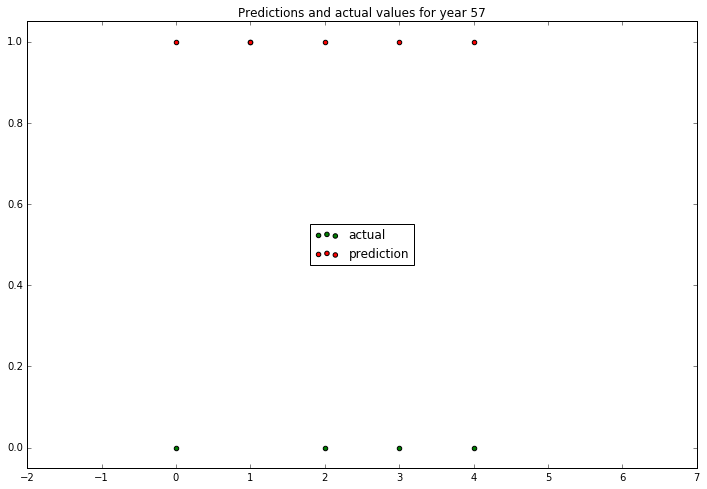

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


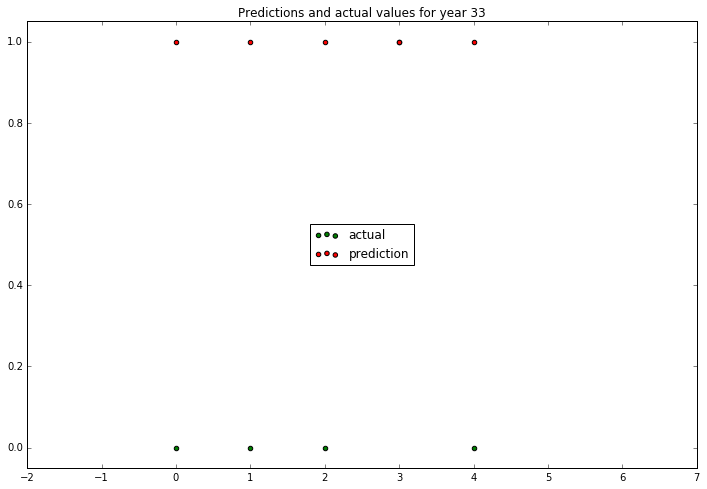

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


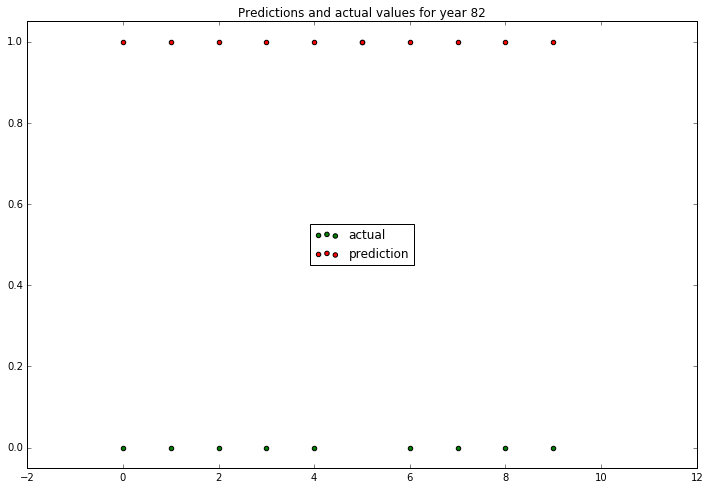

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


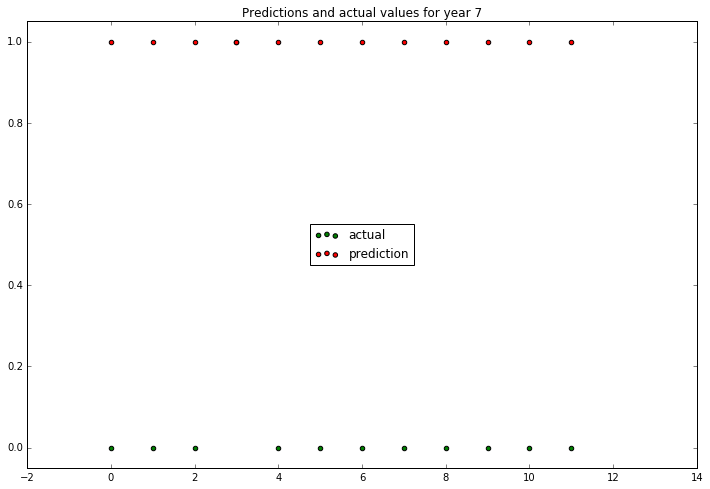

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


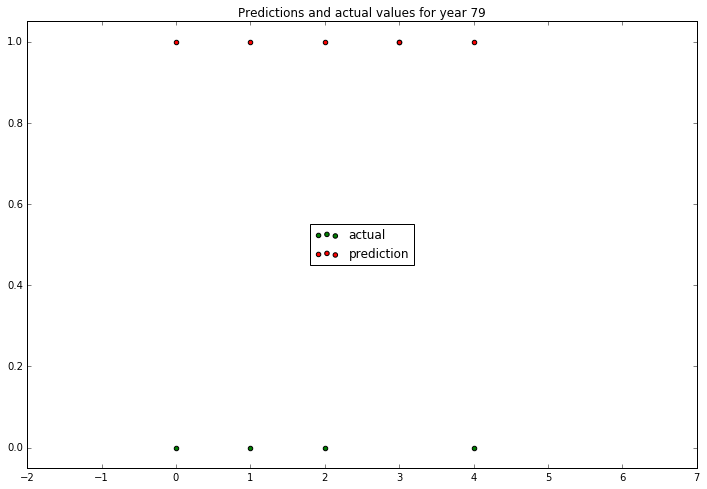

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


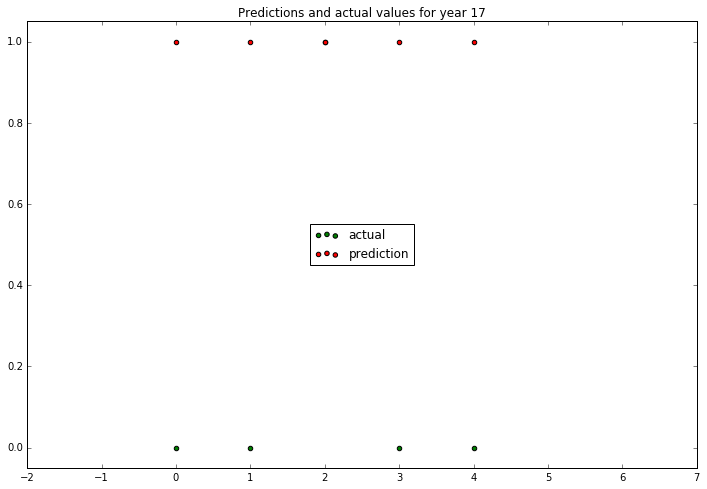

[[ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]
 [ 0.07421676]]


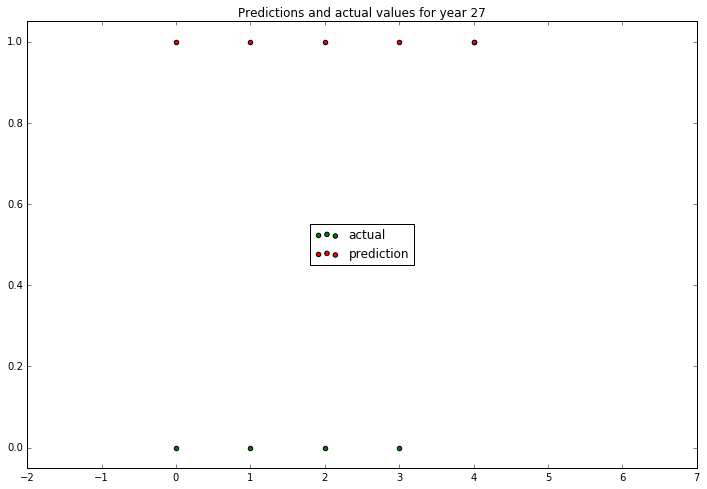

In [313]:
final_preds = model.predict(X_years_removed, batch_size=1, verbose=0)
# print(final_preds)
# print(Y_years_removed)
for year in years_test:
#     np.in1d(Y_years_removed, years_test) 
#     print(np.in1d(X_years_removed[:,0], year))
    tpreds = final_preds[np.where(np.in1d(X_years_removed[:,0], year))]
    print(tpreds)
    tpreds = [1 if p == np.max(tpreds) else 0 for p in tpreds]
    tactual = Y_years_removed[np.where(np.in1d(X_years_removed[:,0], year))]
    
    plt.scatter(range(len(tactual)), tactual, c="g")
    plt.scatter(range(len(tpreds)), tpreds, c="r")
    plt.xlim(-2, len(tpreds) + 2)
    plt.ylim(-0.05, 1.05)
    plt.title('Predictions and actual values for year %s' % (year))
    plt.legend(['actual', 'prediction'], loc='center')
    plt.show()
    
    

In [314]:
for i, scs in enumerate(zip(accs, precs, recs, fscores)):
    print('Stat report for round %s: Acc. %.2f%% | Prec. %.2f%% | Rec. %.2f%% | Fscore %.2f%%' % (i + 1, scs[0], scs[1], scs[2], scs[3]))
print('Average accuracy over all rounds: %.2f%% (+/- %.2f%%)' % (np.mean(accs), np.std(accs)))
print('Average precision over all rounds: %.2f%% (+/- %.2f%%)' % (np.mean(precs), np.std(precs)))
print('Average recall over all rounds: %.2f%% (+/- %.2f%%)' % (np.mean(recs), np.std(recs)))
print('Average Fscore over all rounds: %.2f%% (+/- %.2f%%)' % (np.mean(fscores), np.std(fscores)))

Stat report for round 1: Acc. 83.67% | Prec. 67.35% | Rec. 55.10% | Fscore 54.66%
Stat report for round 2: Acc. 87.76% | Prec. 75.51% | Rec. 63.99% | Fscore 66.67%
Stat report for round 3: Acc. 83.33% | Prec. 37.04% | Rec. 47.62% | Fscore 41.67%
Stat report for round 4: Acc. 83.33% | Prec. 66.67% | Rec. 9.52% | Fscore 16.67%
Stat report for round 5: Acc. 85.11% | Prec. 45.39% | Rec. 22.70% | Fscore 30.26%
Stat report for round 6: Acc. 95.74% | Prec. 100.00% | Rec. 72.70% | Fscore 83.17%
Stat report for round 7: Acc. 85.11% | Prec. 68.09% | Rec. 13.62% | Fscore 22.70%
Stat report for round 8: Acc. 89.36% | Prec. 48.63% | Rec. 68.09% | Fscore 56.74%
Stat report for round 9: Acc. 91.49% | Prec. 68.09% | Rec. 45.39% | Fscore 54.47%
Stat report for round 10: Acc. 89.36% | Prec. 100.00% | Rec. 42.02% | Fscore 58.16%
Average accuracy over all rounds: 87.43% (+/- 3.89%)
Average precision over all rounds: 67.68% (+/- 19.88%)
Average recall over all rounds: 44.07% (+/- 21.24%)
Average Fscore ove